## Roll vs Spot Yield

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
spot_price_df = pd.read_csv("virtual-barrels/test_datasets/WTISPLC_Monthly.csv")
future_price_df = pd.read_csv("virtual-barrels/test_datasets/Crude Oil WTI Futures Historical Data UK.csv")

In [3]:
spot_price_df.head()

,observation_date,WTISPLC
0,1946-01-01,1.17
1,1946-02-01,1.17
2,1946-03-01,1.17
3,1946-04-01,1.27
4,1946-05-01,1.27


In [4]:
future_price_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/06/2025,73.18,61.57,77.58,61.57,3.14M,20.38%
1,01/05/2025,60.79,58.16,64.19,55.30,5.52M,4.43%
2,01/04/2025,58.21,71.39,72.28,55.12,6.86M,-18.56%
3,01/03/2025,71.48,69.95,71.83,65.22,5.05M,2.47%
4,01/02/2025,69.76,74.14,75.18,68.36,4.90M,-3.82%


In [5]:
spot_price_df["observation_date"] = pd.to_datetime(spot_price_df["observation_date"])

In [6]:
future_price_df['Date'] = pd.to_datetime(future_price_df['Date'], format='%d/%m/%Y')

In [7]:
spot_price_df.set_index("observation_date", inplace=True)
future_price_df.set_index("Date", inplace=True)


In [8]:
spot_price_df

,WTISPLC
observation_date,
1946-01-01,1.17
1946-02-01,1.17
1946-03-01,1.17
1946-04-01,1.27
1946-05-01,1.27
...,...
2025-01-01,75.74
2025-02-01,71.53
2025-03-01,68.24


In [9]:
future_price_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-06-01,73.18,61.57,77.58,61.57,3.14M,20.38%
2025-05-01,60.79,58.16,64.19,55.30,5.52M,4.43%
2025-04-01,58.21,71.39,72.28,55.12,6.86M,-18.56%
2025-03-01,71.48,69.95,71.83,65.22,5.05M,2.47%
2025-02-01,69.76,74.14,75.18,68.36,4.90M,-3.82%
...,...,...,...,...,...,...
2020-05-01,35.49,19.04,35.77,18.05,5.91M,88.38%
2020-04-01,18.84,20.10,29.13,-40.32,14.56M,-8.01%
2020-03-01,20.48,43.70,48.66,19.27,16.68M,-54.24%


In [10]:
prices_df = pd.concat([spot_price_df['WTISPLC'], future_price_df['Price']], axis=1)

In [11]:
prices_df.dropna(inplace=True)

In [12]:
prices_df.columns = ['spot', 'future']

In [13]:
prices_df.head()

,spot,future
2020-01-01,57.52,51.56
2020-02-01,50.54,44.76
2020-03-01,29.21,20.48
2020-04-01,16.55,18.84
2020-05-01,28.56,35.49


In [14]:
prices_df["spot_returns"] = prices_df["spot"].pct_change()
prices_df["roll_returns"] = (prices_df["future"] - prices_df["spot"]) / prices_df["spot"]

In [15]:
prices_df["cumulative_spot_returns"] = prices_df["spot_returns"].fillna(0).cumsum()
prices_df["cumulative_roll_returns"] = prices_df["roll_returns"].fillna(0).cumsum()
prices_df.head()


,spot,future,spot_returns,roll_returns,cumulative_spot_returns,cumulative_roll_returns
2020-01-01,57.52,51.56,NaN,-0.103616,0.000000,-0.103616
2020-02-01,50.54,44.76,-0.121349,-0.114365,-0.121349,-0.217981
2020-03-01,29.21,20.48,-0.422042,-0.298870,-0.543391,-0.516851
2020-04-01,16.55,18.84,-0.433413,0.138369,-0.976804,-0.378483
2020-05-01,28.56,35.49,0.725680,0.242647,-0.251124,-0.135836


In [16]:
prices_df = prices_df.tail(24)

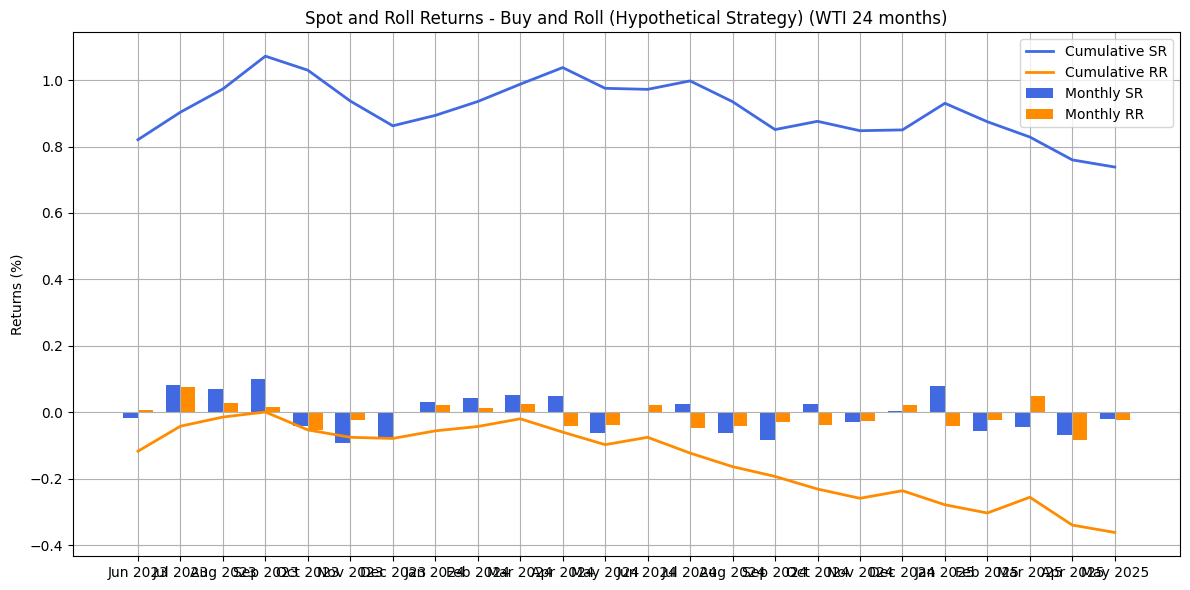

In [17]:
# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(prices_df))

# Bar plots
plt.bar(x - bar_width/2, prices_df["spot_returns"], width=bar_width, color="royalblue", label="Monthly SR")
plt.bar(x + bar_width/2, prices_df["roll_returns"], width=bar_width, color="darkorange", label="Monthly RR")

# Line plots
plt.plot(x, prices_df["cumulative_spot_returns"], color="royalblue", linewidth=2, label="Cumulative SR")
plt.plot(x, prices_df["cumulative_roll_returns"], color="darkorange", linewidth=2, label="Cumulative RR")

# Ticks and labels
plt.xticks(x, prices_df.index.strftime("%b %Y"))
plt.ylabel("Returns (%)")
plt.title("Spot and Roll Returns - Buy and Roll (Hypothetical Strategy) (WTI 24 months)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()